In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

import validate

In [9]:
length = 200

In [10]:
def filename2label(fn):
    s = fn.find('-') + 1
    e = fn.rfind('_')
    return fn[s:e]

def load_trajs_labels(directory):
    filenames = [
        'trajdata_i101_trajectories-0750am-0805am_trajectories.npz',
        'trajdata_i101_trajectories-0805am-0820am_trajectories.npz',
        'trajdata_i101_trajectories-0820am-0835am_trajectories.npz',
        'trajdata_i80_trajectories-0400-0415_trajectories.npz',
        'trajdata_i80_trajectories-0500-0515_trajectories.npz',
        'trajdata_i80_trajectories-0515-0530_trajectories.npz'
    ]
    labels = [filename2label(fn) for fn in filenames]
    filepaths = [os.path.join(directory, fn) for fn in filenames]
    trajs = [validate.load_trajectories(fp) for fp in filepaths]
    return trajs, labels

In [18]:
directory = '../../data/experiments/NGSIM-infogail-improved/imitate/validation/'
infogail_trajs, infogail_labels = load_trajs_labels(directory)
# directory = '../../data/experiments/NGSIM-gail/imitate/validation/'
# gail_trajs, gail_labels = load_trajs_labels(directory)
directory = '../../data/experiments/NGSIM-hgail/imitate/validation/'
hgail_trajs, hgail_labels = load_trajs_labels(directory)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/experiments/NGSIM-gail/imitate/validation/trajdata_i80_trajectories-0400-0415_trajectories.npz'

In [12]:
def visualize_trajectories(trajs, length, label='', color='blue', attr='rmse'):
    rmses = []
    for traj in trajs:
        if len(traj[attr]) == length:
            rmses.append(traj[attr])
    rmses = np.array(rmses)
    mean = np.mean(rmses, axis=0)
    bound = np.std(rmses, axis=0) / np.sqrt(len(rmses)) / 2
    x = range(len(mean))
    plt.fill_between(x, mean - bound, mean + bound, alpha=.4, color=color)
    plt.plot(x, mean, c=color, label='mean {}: {:.5f}'.format(attr, np.mean(rmses)))
    plt.xlabel('timesteps')
    plt.ylabel(attr)
    plt.title(label)
    plt.legend()

In [16]:
def plot_validation(trajs, labels, color='blue', length=200, attr='rmse'):
    for i, traj in enumerate(trajs):
        plt.subplot(2,3,i+1)
        visualize_trajectories(traj, length, labels[i], attr=attr, color=color)

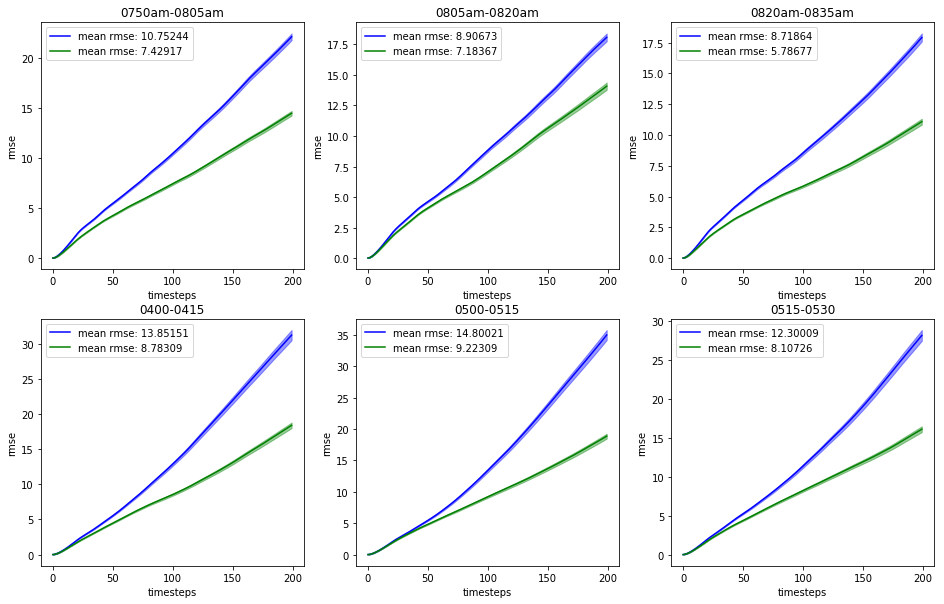

In [17]:
attrs = ['rmse']#, 'is_colliding']#, 'markerdist_right', 'markerdist_left']
for attr in attrs:
    plt.figure(figsize=(16,10))
    plot_validation(infogail_trajs, infogail_labels, color='blue', attr=attr)
    plot_validation(gail_trajs, gail_labels, color='red', attr=attr)
    plot_validation(hgail_trajs, hgail_labels, color='green', attr=attr)
    plt.show()